In [1]:
from o2o import BivariateHawkesProcessSimulator, ParameterEstimator, O2OAnalyzer

In [2]:
T = 200 # Time window
M = 10 # Number of users (e.g., gangs)

### Generate synthetic online and offline data using a Bivariate Hawkes Process

This step generates synthetic data, useful for testing or understanding how the model behaves. However, you can skip it if you plan to use real data instead.

The model expects input data in the form of timestamp lists, where each timestamp represents the number of days since the start of the observation window. If your data is in a standard date format (like `YYYY-MM-DD`), you’ll need to convert it into days relative to a reference start date.

Real data could come from, for example, gang-related social media posts (online) and violent incidents (offline), or other settings involving paired behaviors, such as customer actions online and in-store, or emergency alerts and real-world responses.


In [3]:
sim = BivariateHawkesProcessSimulator(M, T) #call the class
data_online, data_offline = sim.simulate() #simulate the data

Once synthetic or real timestamp data is provided, the package:

* **Fits the bivariate Hawkes process model to the data.**
* **Estimates spillover effects ($\alpha_{ij}$) along with 95% confidence intervals.**
* **Estimates decay rates ($\gamma_{ij}$) and their corresponding 95% confidence intervals.**
* **Quantifies the percentage of events attributed to cross-type influence (e.g., online caused by offline, and vice versa).**
* **Estimates baseline intensities for online and offline activity per user, with 95% confidence intervals.**


In [ ]:
estimator = ParameterEstimator(data_online, data_offline, M, T) #call the class
fit = estimator.fit_model(data_online, data_offline, M, T) #fit the model (It takes some time...)

In [8]:
spillover, decay = estimator.spillover_and_decays_values_and_CI() #spillover and decay rates with their 95% CI
percentages = estimator.spillover_percentage() # percentage effect that each event type has on the other
base_estimation = estimator.base_and_CI()  # baseline intensity for online and offline activitiy with their 95% CI for each user

In [9]:
display(spillover)
display(decay)
display(percentages)
display(base_estimation)

,Effect,Value,95% CI
0,Online to Online Spillover,0.546,"[0.493, 0.599]"
1,Offline to Offline Spillover,0.320,"[0.261, 0.381]"
2,Online to Offline Spillover,0.095,"[0.063, 0.130]"
3,Offline to Online Spillover,0.198,"[0.113, 0.293]"


,Effect,Value,95% CI
0,Online to Online Decay,0.965,"[0.769, 1.227]"
1,Offline to Offline Decay,6.124,"[4.441, 8.190]"
2,Online to Offline Decay,0.509,"[0.262, 0.900]"
3,Offline to Online Decay,2.299,"[1.076, 4.283]"


,User,% Online → Offline,% Offline → Online
0,User 1,17.023,35.571
1,User 2,17.775,34.066
2,User 3,15.781,38.371
3,User 4,14.221,42.580
4,User 5,14.498,41.768
5,User 6,19.402,31.210
6,User 7,16.527,36.638
7,User 8,13.618,44.465
8,User 9,14.743,41.073
9,User 10,15.493,39.085


,User,Online baseline intensity,Online baseline intensity 95% CI,Offline baseline intensity,Offline baseline intensity 95% CI
0,User 1,0.394,"[0.271, 0.536]",0.179,"[0.091, 0.275]"
1,User 2,0.198,"[0.139, 0.267]",0.097,"[0.060, 0.140]"
2,User 3,0.194,"[0.138, 0.257]",0.077,"[0.044, 0.115]"
3,User 4,0.217,"[0.160, 0.276]",0.071,"[0.036, 0.113]"
4,User 5,0.221,"[0.158, 0.287]",0.075,"[0.040, 0.113]"
5,User 6,0.188,"[0.132, 0.247]",0.107,"[0.067, 0.151]"
6,User 7,0.218,"[0.161, 0.284]",0.094,"[0.058, 0.138]"
7,User 8,0.216,"[0.157, 0.278]",0.065,"[0.031, 0.102]"
8,User 9,0.217,"[0.162, 0.274]",0.076,"[0.041, 0.115]"
9,User 10,0.198,"[0.142, 0.265]",0.076,"[0.041, 0.116]"


After estimating the model, the package also provides:

* **User-level summaries**: Displays the number of online and offline events for each user.  
* **Visualization**: Plots the coupled online–offline intensity over time for each user.

In [14]:
analyzer = O2OAnalyzer(data_online, data_offline, M, T, fit) # call the class

,User,Online sample size,Offline sample size
0,User 1,600,218
1,User 2,60,23
2,User 3,57,18
3,User 4,58,19
4,User 5,64,20
5,User 6,64,30
6,User 7,62,23
7,User 8,65,19
8,User 9,57,20
9,User 10,62,21


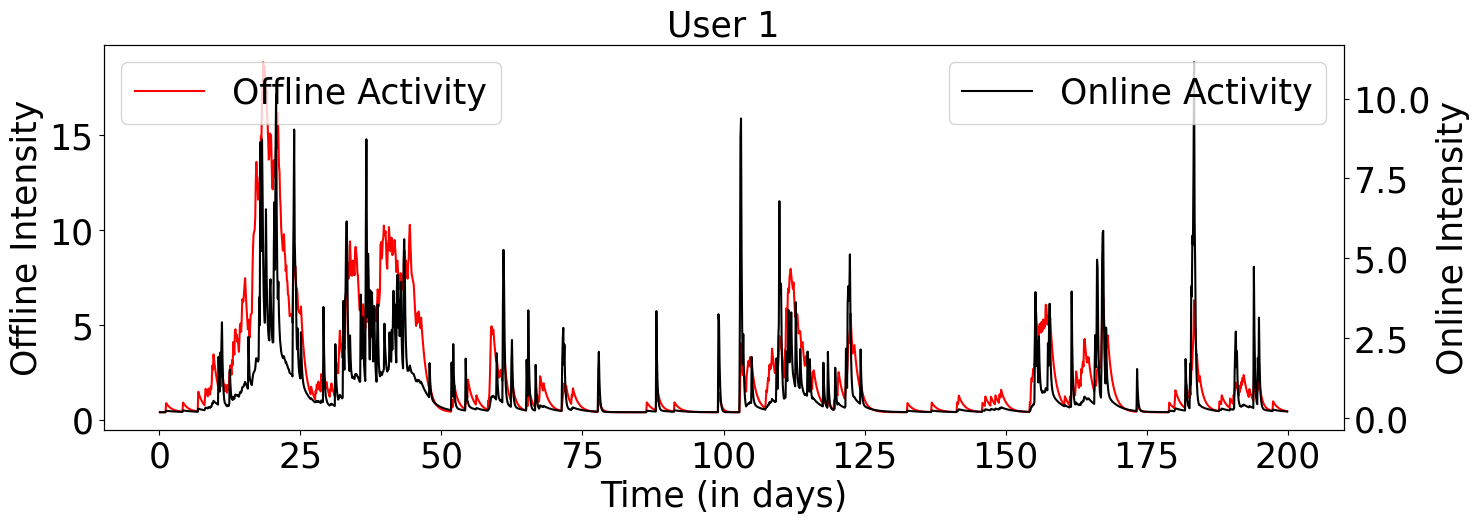

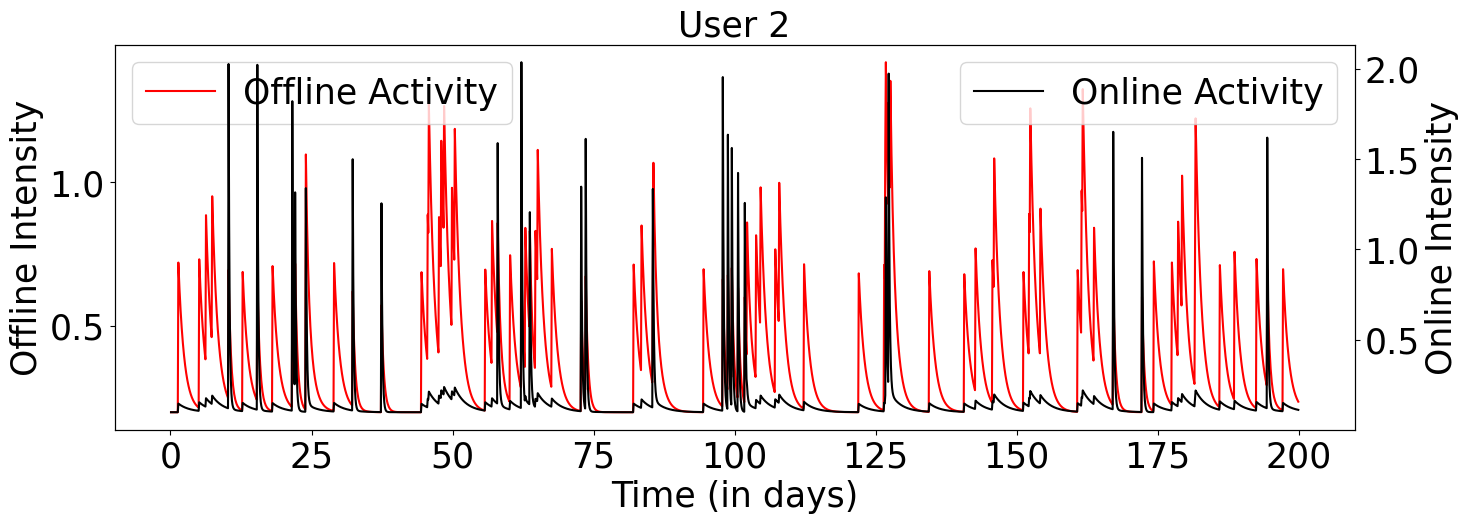

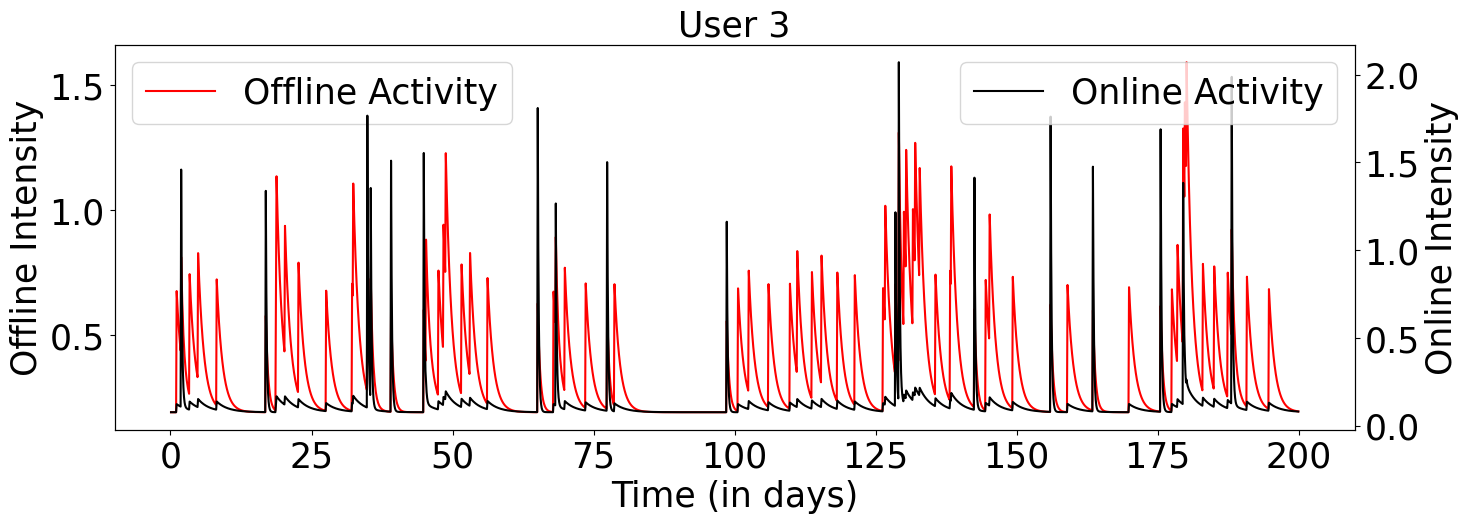

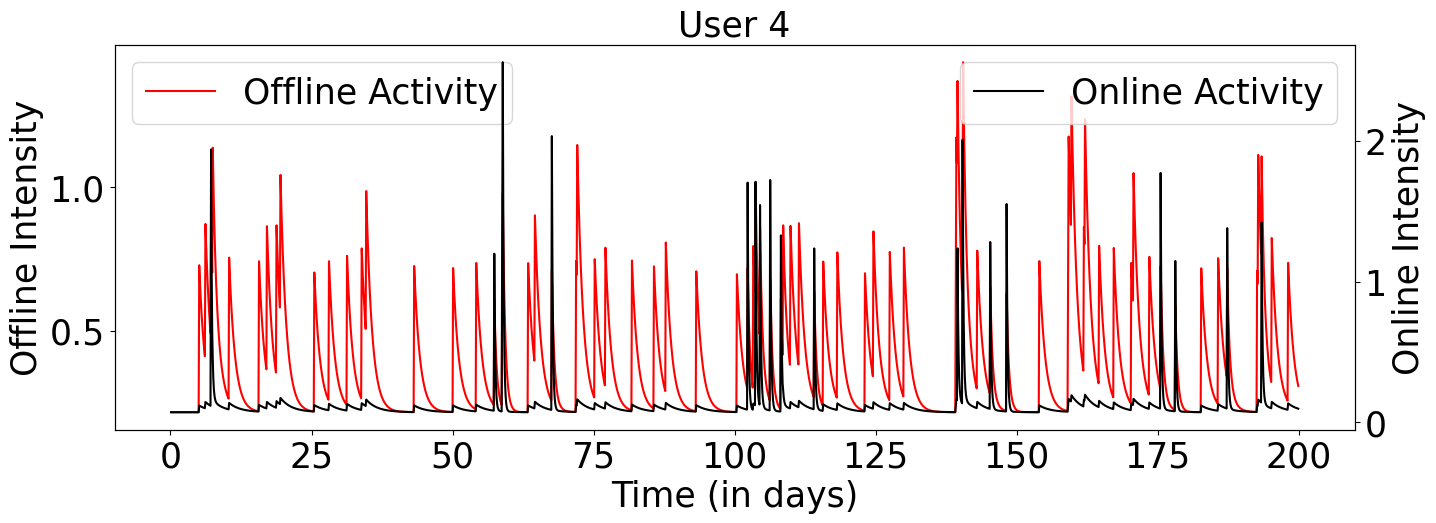

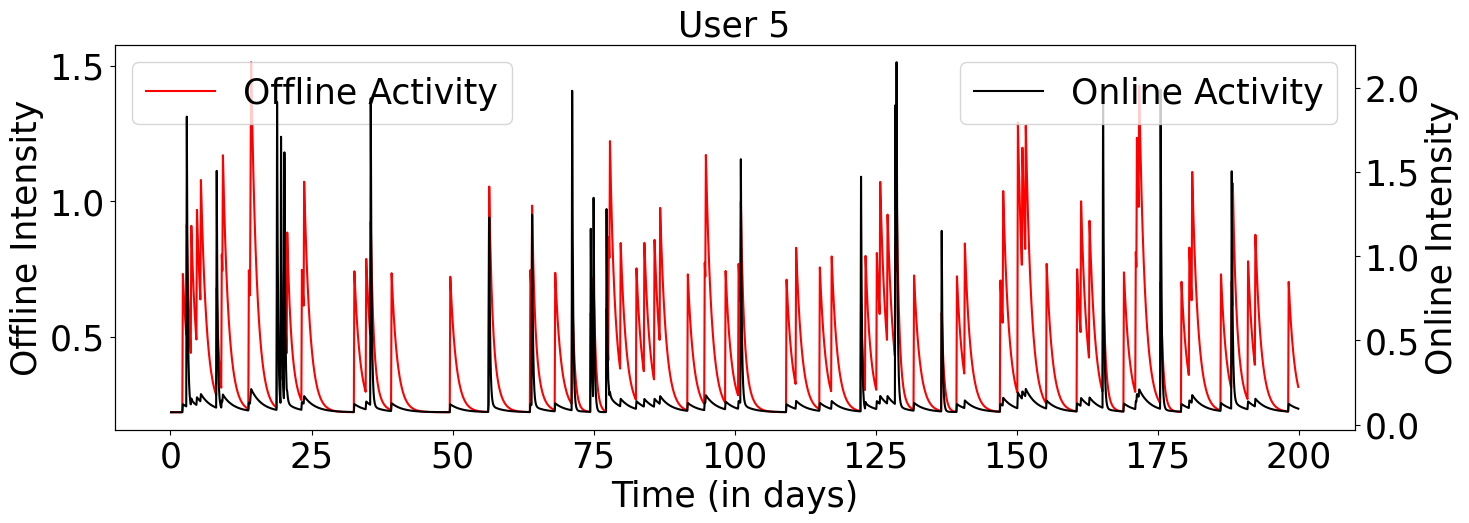

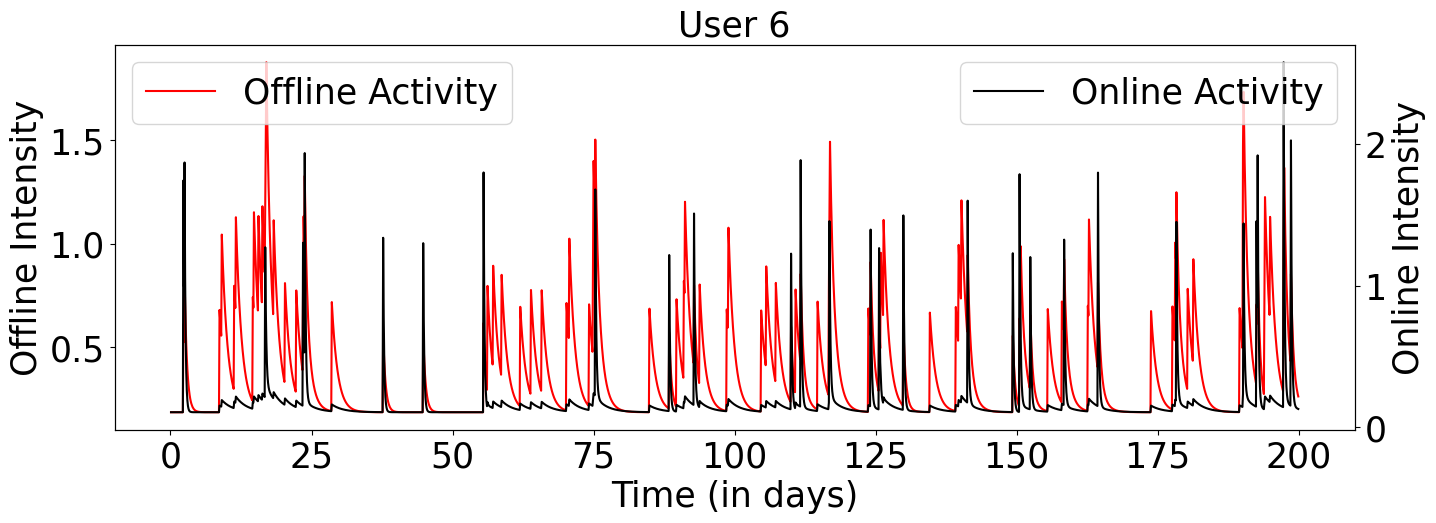

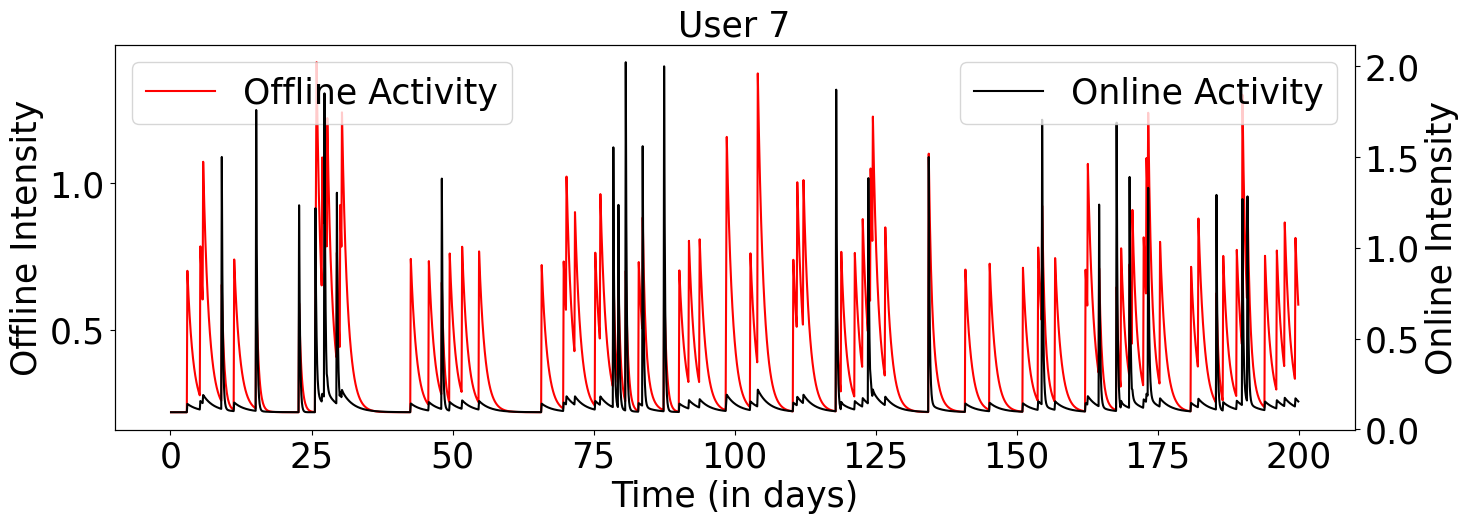

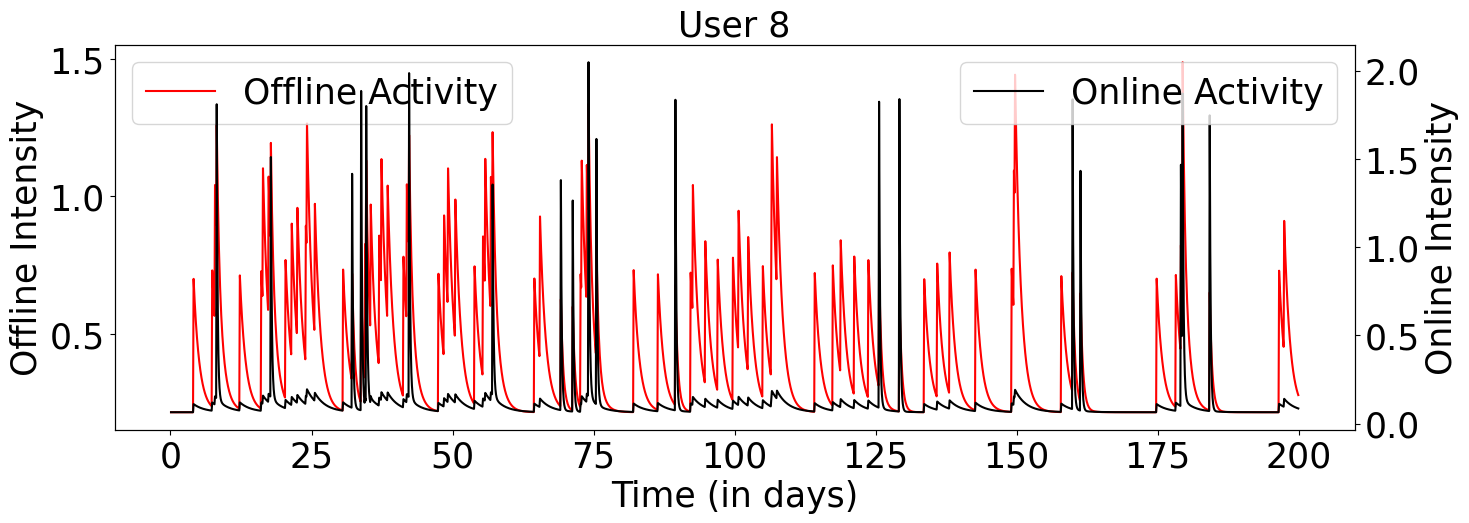

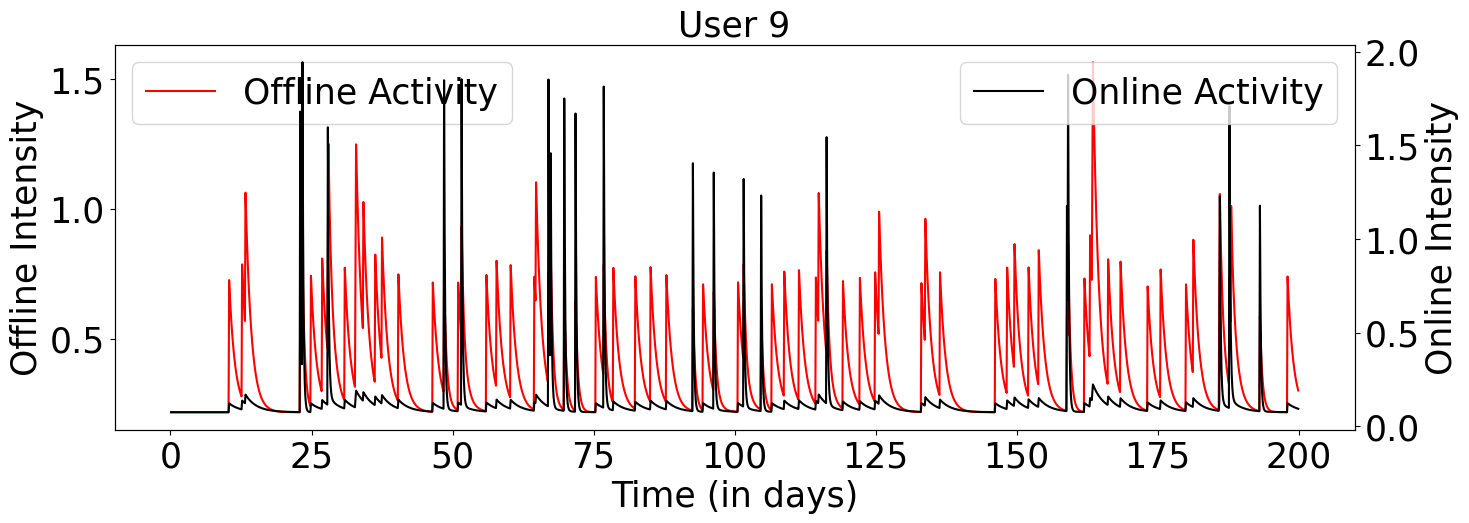

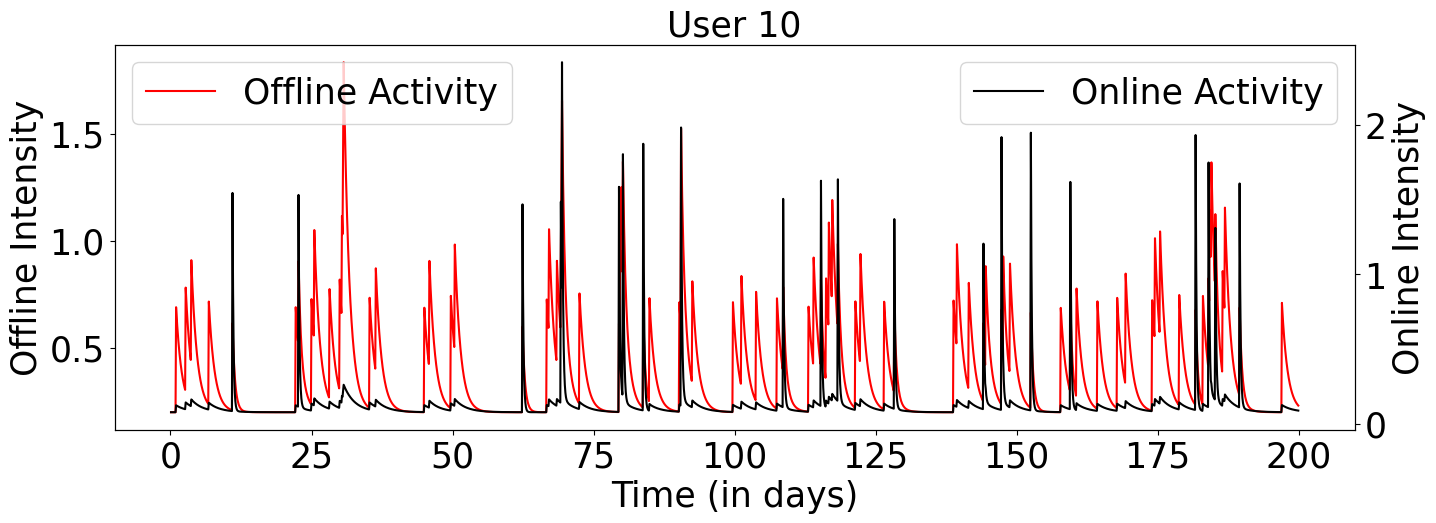

In [16]:
sizes = analyzer.sample_size() # sizes of online and offline activity for each user
display(sizes)
analyzer.plot_intensity() # plot the coupled online--offline intensity for each user